In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI Fundamentals/project/project/Breast_Cancer.csv')

## **1.Data Exploration**

In [ ]:
df.shape

(4024, 16)

In [ ]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

Text(0, 0.5, 'Count')

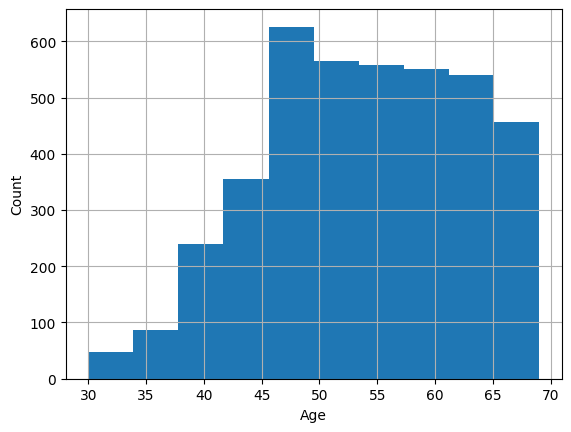

In [ ]:
df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')

In [ ]:
df['Race'].value_counts()

White    3413
Other     320
Black     291
Name: Race, dtype: int64

<Axes: >

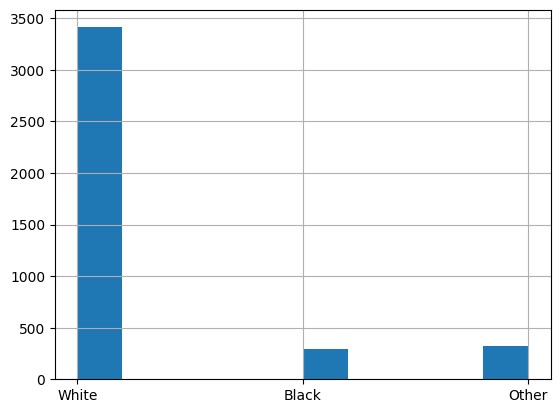

In [ ]:
df['Race'].hist()

In [ ]:
df['Marital Status'].value_counts()

Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64

<Axes: >

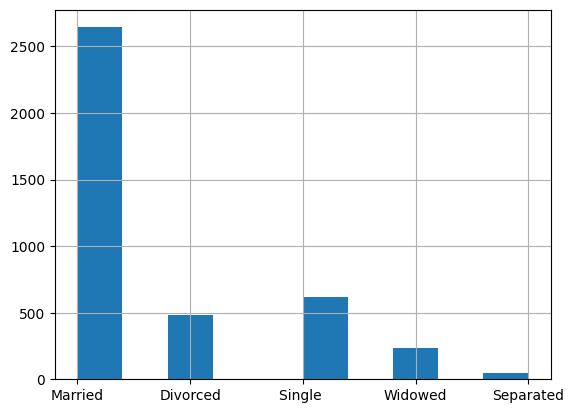

In [ ]:
df['Marital Status'].hist()

In [ ]:
df['Estrogen Status'].value_counts()

Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64

<Axes: >

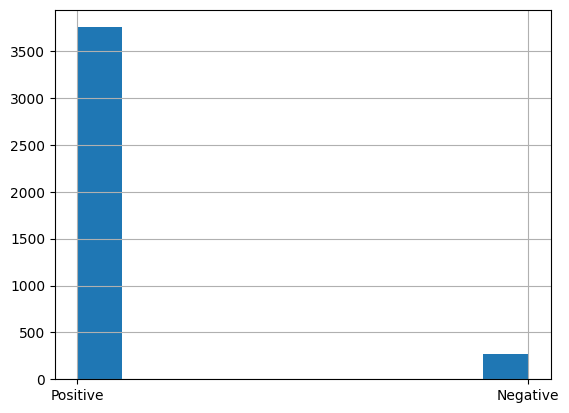

In [ ]:
df['Estrogen Status'].hist()

In [ ]:
df['Progesterone Status'].value_counts()

Positive    3326
Negative     698
Name: Progesterone Status, dtype: int64

<Axes: >

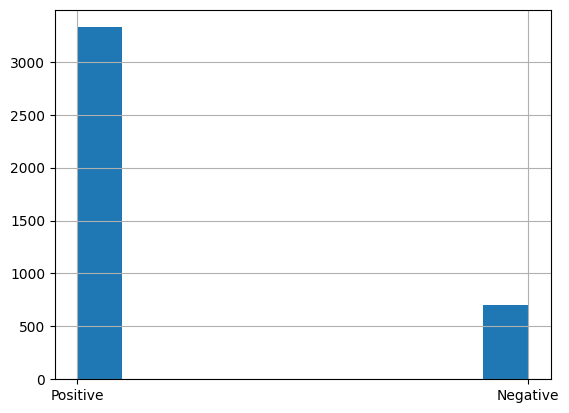

In [ ]:
df['Progesterone Status'].hist()

In [ ]:
df['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

<Axes: >

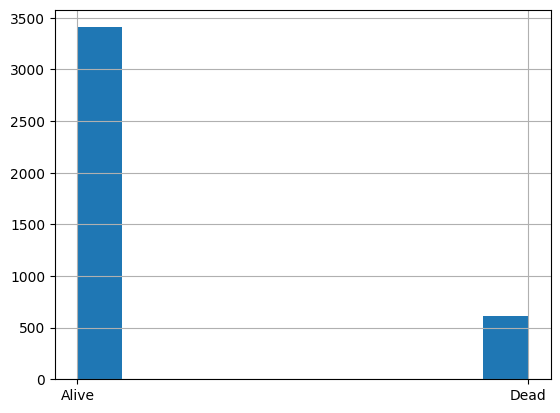

In [ ]:
df['Status'].hist()

<Axes: >

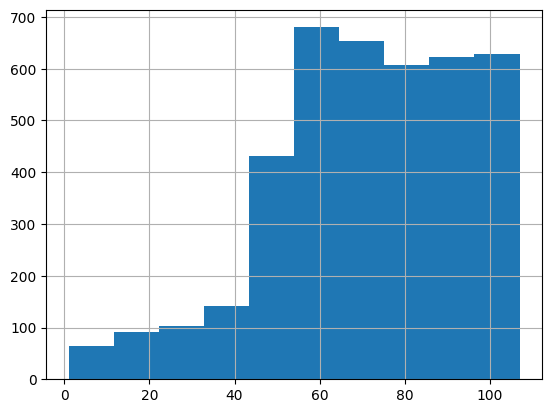

In [ ]:
df['Survival Months'].hist()

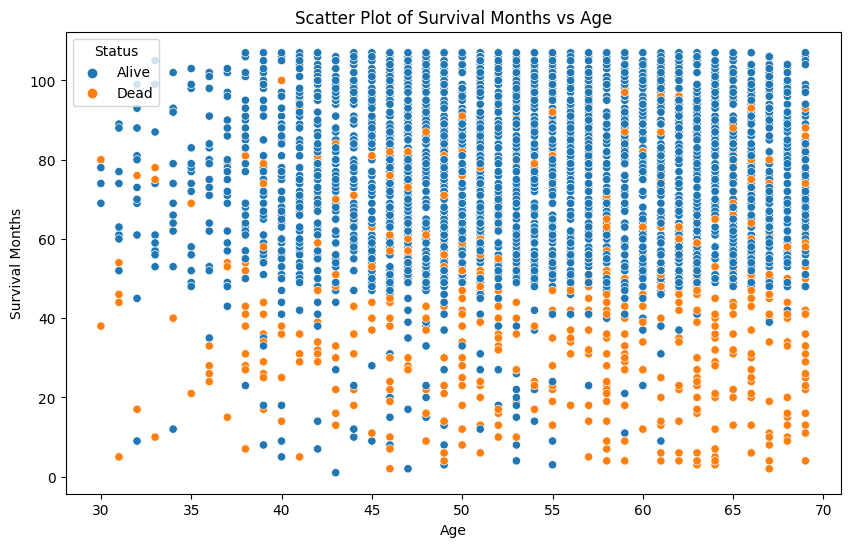

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Survival Months', hue='Status')
plt.title('Scatter Plot of Survival Months vs Age')
plt.xlabel('Age')
plt.ylabel('Survival Months')
plt.show()


# **2. Data Preprocessing**

# **2.1.handling missing data**

In [ ]:
# Check for missing values
print(df.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


**There is no missing values**
**but if there was missing values we can fix it by this code**

df = df.dropna() # Remove the rows with missing values

df.fillna(method='ffill', inplace=True) #Forward fill

# **2.2.Encoding Categorical Features**

Because Machine learning models require all input and output variables to be numeric. This means that if the data contains categorical data, we will need to encode these into a numeric format.

In [ ]:
# Encoding categorical features
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1,49,0
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8,69,0
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3,69,0
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1,72,0


In [ ]:
print(df.iloc[7])

Age                       40
Race                       2
Marital Status             1
T Stage                    1
N Stage                    0
6th Stage                  1
differentiate              0
Grade                      2
A Stage                    1
Tumor Size                30
Estrogen Status            1
Progesterone Status        1
Regional Node Examined     9
Reginol Node Positive      1
Survival Months           14
Status                     1
Name: 7, dtype: int64


Alive=0

Dead=1

# **2.3.Splitting the Data**










In [ ]:
# Splitting the Data

from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1)  # Assuming 'Status' is the target variable
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3219, 15)
(805, 15)


# **3. Model Building**



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)


# **Hyperparameter Tuning using GridSearchCV**





## **now we will use the GridSearchCV to find the best hyperparameters for the decision tree**
## **max_depth**This parameter controls the maximum depth of the tree.
## **min_samples_split**This parameter defines the minimum number of samples required to split an internal node.
## **min_samples_leaf**This parameter sets the minimum number of samples required to be at a leaf node.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize the Grid Search
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# **4. Model Training**

**The model is trained using the training data (X_train and y_train).**

In [ ]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)



**Thi next  code will prints the best hyperparameter values for the decision tree model as determined by the GridSearchCV process.**

In [ ]:
# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


max_depth: 10: The decision tree will make decisions up to 10 levels deep.

min_samples_leaf: 2: Each leaf of the tree must have at least 2 samples.

min_samples_split: 10: A node must have at least 10 samples to be split into further branches.

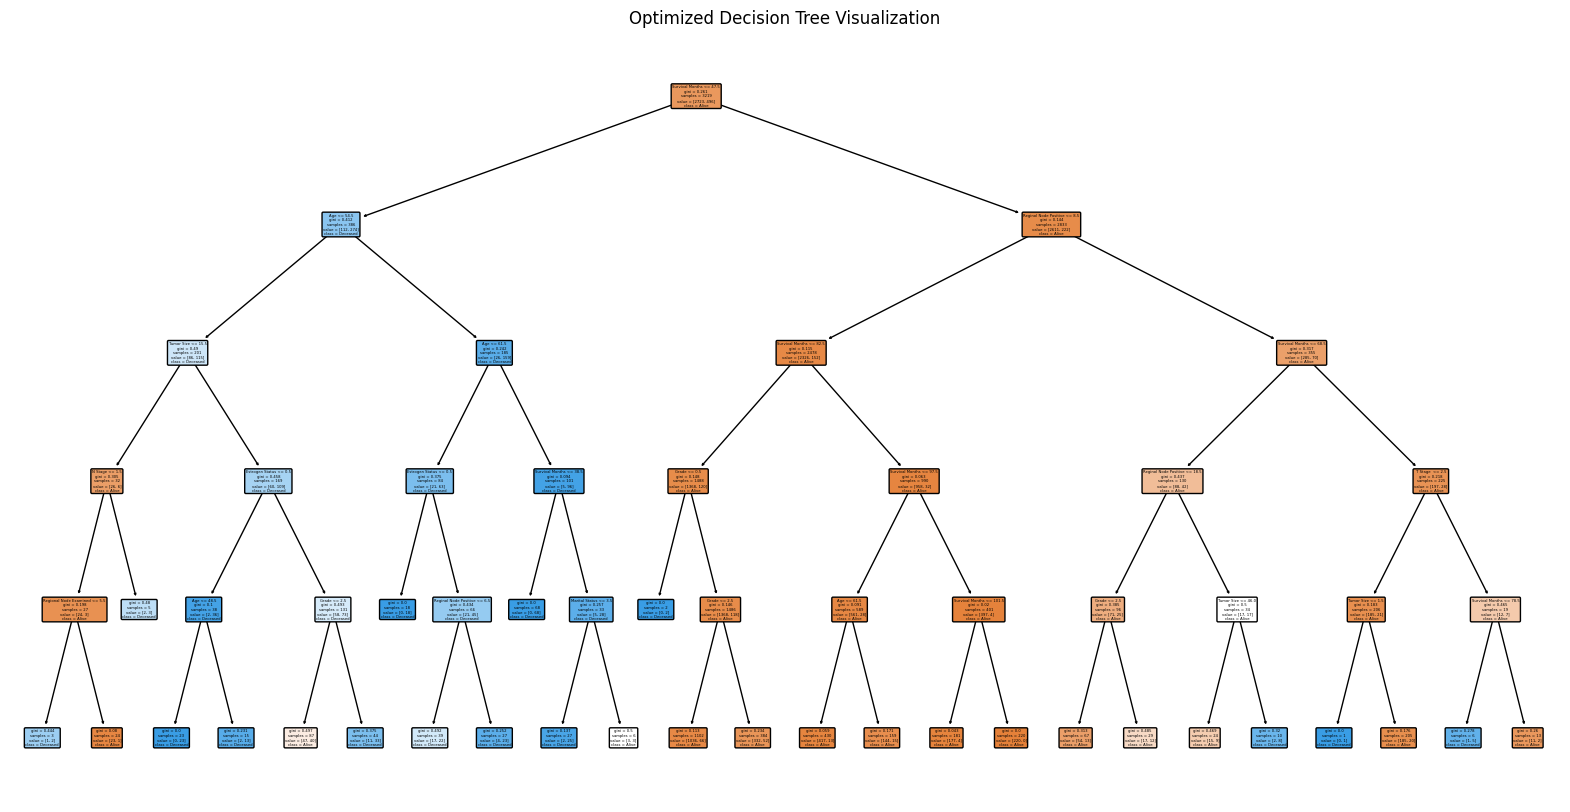

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualization of the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=X_train.columns, class_names=['Alive', 'Deceased'], rounded=True)
plt.title("Optimized Decision Tree Visualization")
plt.show()

# **5. Model Evaluation**

In [ ]:
# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

In [ ]:
# Evaluate the best model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

# **6. Results and Analysis**

In [ ]:
# Print the evaluation metrics for the best model
print("Optimized Decision Tree Model:")
print("Accuracy:", accuracy)
print("Precision:", precision, )
print("Recall:", recall, )
print("F1-Score:", f1)


Optimized Decision Tree Model:
Accuracy: 0.9043478260869565
Precision: 0.8549105471966465
Recall: 0.7307177615571776
F1-Score: 0.7733480570862328


hi